**Importing the dependencies**

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score

Numpy will be used to make arrays in python.

Panda is imported here to create the structured table, because we have file in csv format.

Since we are importing only a specific function thats why "from_import" is used
We have split our data into training & test data that's why train_test_split function is called.


**Data Collection & Processing Part**

In [82]:
#loading the csv data to a Pandas Dataframe
heart_data = pd.read_csv('/content/heart.csv') #it will read out data & store the data in dataframe

In [83]:
#head function will show first 5 rows of dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [84]:
# tail function will show last 5 rows of dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [85]:
#To see no. of rows & Colums in our dataset (rows,columns)
heart_data.shape

(1025, 14)

In [86]:
#For getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [87]:
#Checking for missing values (In case of missing value use imputation method)
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
# Statistical measures about the data
#25% means : 25% values are less than 48 in age coulumn
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [89]:
# Checking the distribution of Target Variable
heart_data['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

1 : Represent Heart Disease

0 : Represent Healthy Heart

 **Splitting the Features and Target**

When we are dropping a column in data, we give axis = 1

When we are dropping a row in data, we give axis = 0


In [90]:
X = heart_data.drop(columns='target',axis=1) # Here I have loaded the data (With all columns except target coulumn)
Y = heart_data['target'] # Storing target column in Y variable

In [91]:
# Checking target column is dropped or not
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [92]:
# Print the target column
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


**Now Splitting the data into Training data & Test Data**

X_train : Contains features of all the training data

Y_train : Contains target of all the features present in X_train

X_test : Contains features of all the test data

Y_test : Contains traget of all the features present in X_test

In [93]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [94]:
# Here 80% data go into training & 20% data go for test
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(1025, 13) (820, 13) (205, 13)
(1025,) (820,) (205,)


**Model 1 : Logistic Regression**

In [95]:
# we are going to load one instance of Logistic Regresion Model into variable 'model', which I had imported from sklearn
model_1 = LogisticRegression()
# We are going to train out Logistic Regression model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_1.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_1.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_lr)
# Accuracy on Test data
X_train_prediction = model_1.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_lr)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_1.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.8524390243902439
Accuracy on Test Data :  0.8048780487804879
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


**Model 2 : Support Vector Machine**

In [96]:
# we are going to load one instance of Support Vector Machine Model into variable 'model_2', which I had imported from sklearn
model_2 = svm.SVC(kernel='linear')
# We are going to train out Support Vector Machine model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_2.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_2.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_svm)
# Accuracy on Test data
X_train_prediction = model_2.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_svm)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_2.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.8695121951219512
Accuracy on Test Data :  0.824390243902439
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


**Model 3 : Gaussian Naive Bayes**

In [97]:
# we are going to load one instance of Gaussian Naive Bayes Model into variable 'model_2', which I had imported from sklearn
model_3 = GaussianNB()
# We are going to train out Gaussian Naive Bayes model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_3.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_3.predict(X_train)
training_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_gnb)
# Accuracy on Test data
X_train_prediction = model_3.predict(X_test)
test_data_accuracy_gnb = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_gnb)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_3.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.8390243902439024
Accuracy on Test Data :  0.7804878048780488
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


**Model 4 : K-Nearest Neighbour**

In [98]:
# we are going to load one instance of Gaussian Naive Bayes Model into variable 'model_2', which I had imported from sklearn
model_4 = KNeighborsClassifier(n_neighbors=16)
# We are going to train out Gaussian Naive Bayes model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_4.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_4.predict(X_train)
training_data_accuracy_knn = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_knn)
# Accuracy on Test data
X_train_prediction = model_4.predict(X_test)
test_data_accuracy_knn = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_knn)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_4.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.775609756097561
Accuracy on Test Data :  0.7414634146341463
[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


**Model 5 : Decision Tree**

In [99]:
# We are going to load one instance of Gaussian Naive Bayes Model into variable 'model_2', which I had imported from sklearn
model_5 = tree.DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
# We are going to train out Gaussian Naive Bayes model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_5.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_5.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_dt)
# Accuracy on Test data
X_train_prediction = model_5.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_dt)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_5.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.9560975609756097
Accuracy on Test Data :  0.926829268292683
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Model 6 : Random Forest Classifier**

In [100]:
# We are going to load one instance of Random Forest Classifier Model into variable 'model_2', which I had imported from sklearn
model_6 = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
# We are going to train out Random Forest Classifier model with Training Data
# Fit function will try to find the pattern & relationship between the features and the corresponding target. And once we train our model we can predict for new values
model_6.fit(X_train, Y_train)

# Accuracy on Training data
X_train_prediction = model_6.predict(X_train)
training_data_accuracy_rf = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training Data : ', training_data_accuracy_rf)
# Accuracy on Test data
X_train_prediction = model_6.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_train_prediction, Y_test)
print('Accuracy on Test Data : ', test_data_accuracy_rf)

input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)
# Currently it is a tuple, and we have to convert it into numpy array
# asarray function will convet tuple datatype into numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_6.predict(input_data_reshaped)
print(prediction) # It will print in list form

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

Accuracy on Training Data :  0.9353658536585366
Accuracy on Test Data :  0.8780487804878049
[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [101]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression','Support Vector Machine','Gaussian Naive Bayes','K-Nearest Neighbour','Decision Tree','Random Forest'], 'Training Data Accuracy': [training_data_accuracy_lr*100,
                    training_data_accuracy_svm*100,training_data_accuracy_gnb*100,training_data_accuracy_knn*100,training_data_accuracy_dt*100,
                    training_data_accuracy_rf*100], 'Test Data Accuracy': [test_data_accuracy_lr*100,
                    test_data_accuracy_svm*100,test_data_accuracy_gnb*100,test_data_accuracy_knn*100,test_data_accuracy_dt*100,
                    test_data_accuracy_rf*100]})
model_ev

,Model,Training Data Accuracy,Test Data Accuracy
0,Logistic Regression,85.243902,80.487805
1,Support Vector Machine,86.951220,82.439024
2,Gaussian Naive Bayes,83.902439,78.048780
3,K-Nearest Neighbour,77.560976,74.146341
4,Decision Tree,95.609756,92.682927
5,Random Forest,93.536585,87.804878


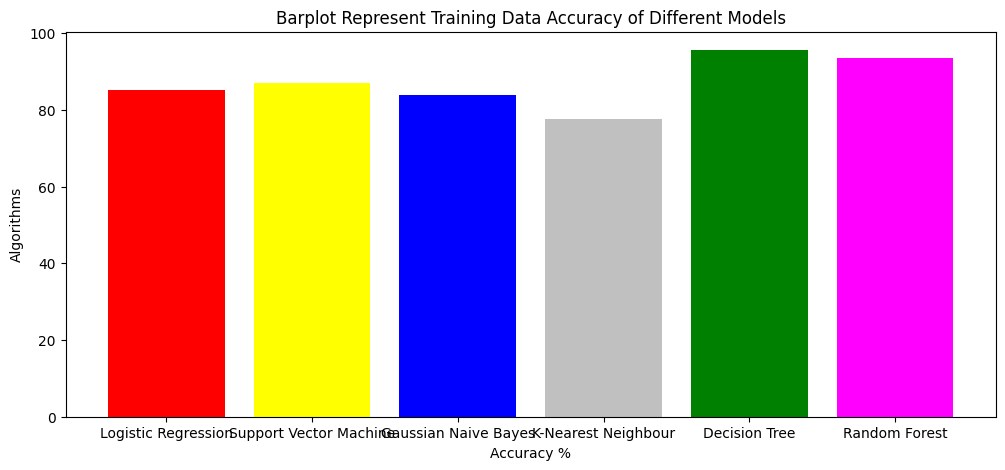

In [102]:
colors = ['red','yellow','blue','silver','green','magenta',]
plt.figure(figsize=(12,5))
plt.title("Barplot Represent Training Data Accuracy of Different Models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(model_ev['Model'],model_ev['Training Data Accuracy'],color = colors)
plt.show()

**Applying Ensemble Learning on all Models**

In [103]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# voting classifier
final_model_1= VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",
)

# training
final_model_1.fit(X_train, Y_train)

# prediction
prediction = final_model_1.predict(X_test)



# evaluation
accuracy = round(accuracy_score(Y_test, prediction) * 100, 3)
auc = round(roc_auc_score(Y_test, prediction), 3)

print(f" Accuracy: {accuracy}%")
print(f" AUC score: {auc}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


 Accuracy: 86.829%
 AUC score: 0.868


In [104]:
final_model = VotingClassifier(
    estimators=[("LR", model_1), ("SVM", model_2), ("GNB", model_3),("KNN", model_4),("DT", model_5),("RF", model_6)],
    voting="hard",)

# training
final_model.fit(X_train.values, Y_train)

# prediction



input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
#std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[1]
The Person has Heart Disease


In [105]:
import pickle  #This library is uesd to save the model

In [106]:
filename = 'trained_model_heart.sav'
pickle.dump(final_model, open(filename,'wb')) #We are opening the file and writing the file in binary format, wb = writing in binary format

In [107]:
#Loading the saved model
loaded_model = pickle.load(open('trained_model_heart.sav','rb'))# rb = reading in binary format

**Just Checking our final_model**

In [108]:
input_data = (71,0,0,112,149,0,1,125,0,1.6,1,0,2)

# changing the input data to numpyarray
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped )
print(prediction)

if(prediction[0]==0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease
